# CAB420 Assignment 1A Question 1: Template
Simon Denman (s.denman@qut.edu.au)

## Overview

This notebook provides a brief template for CAB420 Assignment 1A, Question 1. It implements the data loading, and splitting the data into the predictors and response. You are to use the data splits defined here in your response.

The template also provides other suggestions around how to approach the problem.

Please make sure you read the assignment brief on canvas, and check the FAQ for other information.

**Note: File paths used in this template may need to change for your local machine. Please set these based on your local file system structure.**

In [26]:
import pandas as pd
import numpy as np

In [27]:
# load data
train = pd.read_csv('./Data/Q1/communities_train.csv')
val = pd.read_csv('./Data/Q1/communities_val.csv')
test = pd.read_csv('./Data/Q1/communities_test.csv')

# Pull out X and y components of the data
# if you want to convert this data to numpy format, you can add .to_numpy() to the end of each row below
X_train = train.iloc[:,0:-1]
y_train = train.iloc[:,-1]
X_val = val.iloc[:,0:-1]
y_val = val.iloc[:,-1]
X_test = test.iloc[:,0:-1]
y_test = test.iloc[:,-1]

X_train.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,0.01,0.33,0.00,0.94,0.21,0.11,0.26,0.37,0.22,0.74,...,0.0,0.44,0.73,0.90,0.73,0.85,0.01,0.45,0.47,0.0
1,0.01,0.09,0.02,0.89,0.23,0.13,0.07,0.71,0.27,0.15,...,0.0,0.24,0.37,0.25,0.46,0.34,0.00,1.00,0.06,0.0
2,0.01,0.53,0.02,0.92,0.21,0.03,0.98,1.00,1.00,0.20,...,0.0,0.17,0.32,0.13,0.04,0.18,0.01,0.32,0.01,0.0
3,0.01,0.36,0.00,0.98,0.02,0.00,0.42,0.45,0.29,0.53,...,0.0,0.01,0.81,0.50,0.65,0.76,0.04,0.11,0.00,0.0
4,0.01,0.68,0.01,0.98,0.04,0.01,0.71,0.60,0.62,0.39,...,0.0,0.10,0.71,0.67,0.73,0.55,0.08,0.06,0.07,0.0


In [28]:
# If you wish to pre-process the data, do so here. In your write-up, outline why you choose to do, or choose not to do, any
# pre-processing

In [29]:
# train your Linear Regression model here. Data has already been split into predictors (X_train, X_val and X_test) and the
# desired response (y_train, y_val and y_test above).
#
# Note that you DO NOT NEED to remove any variables, or add higher order terms. JUST USE THE DATA AS IS.
#

# Once you've trained the model, evaluate it. This would include:
#  - Measuring the accuracy of the model (i.e. RMSE or similar measures)
#  - Looking at the properties of the fitted model, for example the R^2, and if all terms are contributing to the model
#  - Considering the validity of the trained model. This could include assumptions about independent predictors, and the 
#    distribution of the residuals
# Your write-up should include your findings regarding the above.

import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:      ViolentCrimesPerPop    R-squared:                       0.759
Model:                               OLS   Adj. R-squared:                  0.637
Method:                    Least Squares   F-statistic:                     6.207
Date:                   Sun, 16 Mar 2025   Prob (F-statistic):           7.72e-28
Time:                           03:04:35   Log-Likelihood:                 251.07
No. Observations:                    298   AIC:                            -300.1
Df Residuals:                        197   BIC:                             73.27
Df Model:                            100                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.4667      0.620      0.753      0.452      -0.755       1.689
 population                 0.9391      1.225      0.767      0.444      -1.476       3.354
 householdsize             -0.4403      0.280     -1.571      0.118      -0.993       0.112
 racepctblack               0.0398      0.157      0.253      0.800      -0.270       0.350
 racePctWhite              -0.1056      0.158     -0.667      0.506      -0.418       0.207
 racePctAsian              -0.0843      0.093     -0.902      0.368      -0.269       0.100
 racePctHisp               -0.3792      0.154     -2.464      0.015      -0.683      -0.076
 agePct12t21               -0.2405      0.316     -0.761      0.447      -0.864       0.383
 agePct12t29                0.7263      0.486      1.494      0.137      -0.232       1.685
 agePct16t24               -0.1488      0.510     -0.292      0.771      -1.155       0.857
 agePct65up                 0.1141      0.271      0.420      0.675      -0.421       0.649
 numbUrban                 -0.8932      1.167     -0.765      0.445      -3.195       1.409
 pctUrban                   0.0757      0.047      1.615      0.108      -0.017       0.168
 medIncome                 -0.4012      0.607     -0.661      0.510      -1.599       0.797
 pctWWage                  -0.2532      0.262     -0.967      0.335      -0.769       0.263
 pctWFarmSelf               0.0585      0.062      0.945      0.346      -0.064       0.181
 pctWInvInc                -0.2106      0.195     -1.080      0.282      -0.595       0.174
 pctWSocSec                 0.2093      0.309      0.677      0.499      -0.401       0.819
 pctWPubAsst                0.1046      0.150      0.698      0.486      -0.191       0.400
 pctWRetire                -0.1134      0.103     -1.097      0.274      -0.317       0.091
 medFamInc                  0.5219      0.553      0.944      0.346      -0.569       1.612
 perCapInc                  0.6423      0.601      1.068      0.287      -0.544       1.829
 whitePerCap               -0.5968      0.490     -1.217      0.225      -1.564       0.370
 blackPerCap                0.0147      0.071      0.206      0.837      -0.126       0.155
 indianPerCap              -0.0768      0.057     -1.346      0.180      -0.189       0.036
 AsianPerCap                0.1090      0.061      1.774      0.078      -0.012       0.230
 OtherPerCap               -0.0325      0.052     -0.630      0.529      -0.134       0.069
 HispPerCap                 0.0474      0.068      0.693      0.489      -0.087       0.182
 NumUnderPov               -0.2538      0.410     -0.618      0.537      -1.063       0.556
 PctPopUnderPov            -0.3099      0.208     -1.492      0.137      -0.719       0.100
 PctLess9thGra

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Feature"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train_const.values, i) for i in range(1, X_train_const.shape[1])]

vif

,Feature,VIF
0,population,301.036172
1,householdsize,43.223331
2,racepctblack,29.407713
3,racePctWhite,27.699090
4,racePctAsian,7.606502
...,...,...
95,PctSameState85,12.730610
96,LandArea,7.016748
97,PopDens,6.065991
98,PctUsePubTrans,4.135846


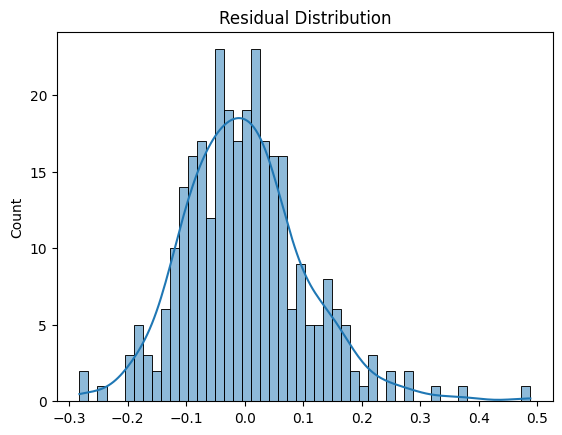

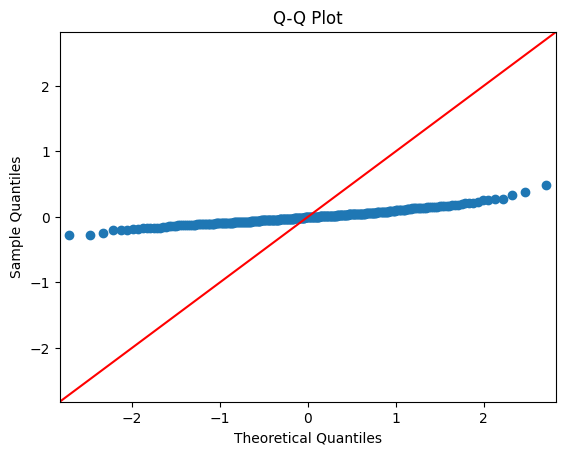

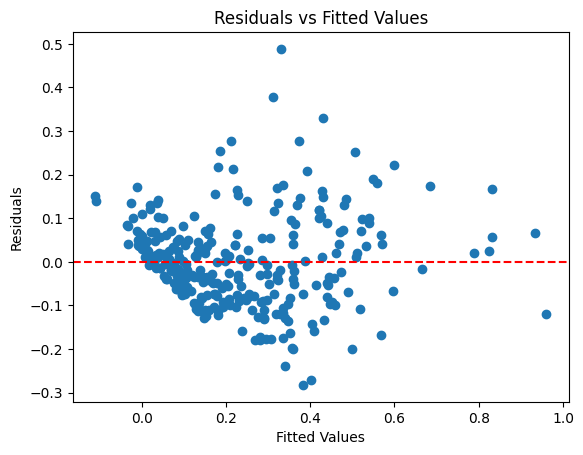

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
residuals = model.resid

# Histogram of Residuals
sns.histplot(residuals, bins=50, kde=True)
plt.title('Residual Distribution')
plt.show()

# Q-Q Plot (Normality Check)
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()

# Residuals vs Fitted Plot (Homoscedasticity Check)
plt.scatter(model.fittedvalues, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [36]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(model.resid)

np.float64(1.8368954469718883)

In [37]:
print("R²:", model.rsquared)
print("Adjusted R²:", model.rsquared_adj)
print("AIC:", model.aic)
print("BIC:", model.bic)

R²: 0.759085121509442
Adjusted R²: 0.6367933050167729
AIC: -300.133317607413
BIC: 73.27312452963281


In [42]:
from sklearn.preprocessing import StandardScaler

# Standardize the data (important for Ridge & LASSO)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [43]:
X_train_const = sm.add_constant(X_train_scaled)
model_linear = sm.OLS(y_train, X_train_const).fit()

In [44]:
# train your regularised models (ridge and lasso). Here you will use the same data as you used in for the above regression model
#
# One key consideration with your regularised models is the selection of lambda (i.e. the strength of the regularisation). A suggested 
# starting point for finding your value of lambda is suggested below using numpy.logspace (see 
# https://numpy.org/doc/stable/reference/generated/numpy.logspace.html). The code below will give you 50 values starting at 10-10 and 
# finishing at 1, spread on a log scale. Just note that for plotting things that result from this, you may want to change the scale of 
# your x-axis to a log scale (see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xscale.html)
#
# Note that the below list of lambda is going to be fairly coarse. For the sake of speed, we suggest that you avoid evaluating a huge
# number of lambdas in one pass, but you can get a more precise estimate by refining your estimate over multiple passes (i.e. if your
# initial estimate if 0.1, you could run the search again now looking over a range of [0.01 .. 1.0] or similar). If you wish to do this,
# we suggest limiting yourself to 2-3 passes at most. You do not need to get the perfect value of lambda.
#
# remember that lambda is a keyword in python, so we're calling the array below alphas. 
#
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-10, 0)

ridge_model = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_model.fit(X_train_scaled, y_train)
# Once you've found your ridge and lasso models, evaluate them, following the approach you've used for the linear method, and compare the
# three models.

/home/segus-faultise/Documents/CAB420-Assessment-1A/env/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


RidgeCV(alphas=array([1.00000000e-10, 1.59985872e-10, 2.55954792e-10, 4.09491506e-10,
       6.55128557e-10, 1.04811313e-09, 1.67683294e-09, 2.68269580e-09,
       4.29193426e-09, 6.86648845e-09, 1.09854114e-08, 1.75751062e-08,
       2.81176870e-08, 4.49843267e-08, 7.19685673e-08, 1.15139540e-07,
       1.84206997e-07, 2.94705170e-07, 4.71486636e-07, 7.54312006e-07,
       1.20679264e-06, 1.93069773e-0...
       5.17947468e-05, 8.28642773e-05, 1.32571137e-04, 2.12095089e-04,
       3.39322177e-04, 5.42867544e-04, 8.68511374e-04, 1.38949549e-03,
       2.22299648e-03, 3.55648031e-03, 5.68986603e-03, 9.10298178e-03,
       1.45634848e-02, 2.32995181e-02, 3.72759372e-02, 5.96362332e-02,
       9.54095476e-02, 1.52641797e-01, 2.44205309e-01, 3.90693994e-01,
       6.25055193e-01, 1.00000000e+00]),
        store_cv_values=True)

In [46]:
from sklearn.linear_model import LassoCV

lasso_model = LassoCV(alphas=alphas, cv=5, max_iter=10000)
lasso_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([1.00000000e-10, 1.59985872e-10, 2.55954792e-10, 4.09491506e-10,
       6.55128557e-10, 1.04811313e-09, 1.67683294e-09, 2.68269580e-09,
       4.29193426e-09, 6.86648845e-09, 1.09854114e-08, 1.75751062e-08,
       2.81176870e-08, 4.49843267e-08, 7.19685673e-08, 1.15139540e-07,
       1.84206997e-07, 2.94705170e-07, 4.71486636e-07, 7.54312006e-07,
       1.20679264e-06, 1.93069773e-0...
       5.17947468e-05, 8.28642773e-05, 1.32571137e-04, 2.12095089e-04,
       3.39322177e-04, 5.42867544e-04, 8.68511374e-04, 1.38949549e-03,
       2.22299648e-03, 3.55648031e-03, 5.68986603e-03, 9.10298178e-03,
       1.45634848e-02, 2.32995181e-02, 3.72759372e-02, 5.96362332e-02,
       9.54095476e-02, 1.52641797e-01, 2.44205309e-01, 3.90693994e-01,
       6.25055193e-01, 1.00000000e+00]),
        cv=5, max_iter=10000)

In [ ]:
# For your write-up, you should include:
# - a discussion of any pre-processing you did and why; or why you left the data as-is
# - a discussion of how you selected the values of lambda used in your regularised models, and what those values are
# - a comparison of three models, considering both the accuracy and validity of the models, as outlined above, this means:
#   > accuracy of the model
#   > measures of fit, such as R^2
#   > testing assumptions about the independence of predictors, and the distribution of the residuals
# - A discussion of the ethical concerns that need to be considered when evaluating the models developed for this problem
# Your write-up should be supported by appropriate figures and tables. Figures and tables should have numbers and meaningful captions. 
# Note that figures and tables are not included in the page limits.
#
# SEE THE ASSIGNMENT BRIEF ON CANVAS FOR MORE DETAILS AND NOTE THAT A NOTEBOOK FILE DOES NOT CONSTITUTE A VALID SUBMISSION. 
# YOU SHOULD WRITE UP YOUR RESPONSE IN A SEPARATE DOCUMENT